In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from numpy import hstack,vstack,dstack
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from uilts import *
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,CuDNNLSTM,Embedding,Activation,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
import matplotlib.pyplot as plt  
from datetime import datetime   
import numpy as np
import statsmodels.api as sm     
from statsmodels.tsa.stattools import adfuller  
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA  
from statsmodels.tsa.arima_model import ARIMAResults
import geopandas
 

2022-10-27 21:05:20.683160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 21:05:20.796493: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-27 21:05:21.219817: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-27 21:05:21.219894: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [4]:
airTemp = './for_students/for_students/tas.nc'
netLongRadiantionFlux = './for_students/for_students/rlns.nc'
shortwaveRadiation = './for_students/for_students/rsds.nc'
precipitation = './for_students/for_students/pr.nc'
output = './for_students/for_students/jedi_output.nc'

landSeaMask = './for_students/for_students/landsea.nc'
lantitude =  './for_students/for_students/latitude.nc'
longitude = './for_students/for_students/longitude.nc'
elevation = './for_students/for_students/elevation.nc'
moisture = './for_students/for_students/paw.nc'
spatialMetaData = './for_students/for_students/globe_surf.nc'

airTempDataset = Dataset(airTemp)
netLongRadiantionFluxDataSet = Dataset(netLongRadiantionFlux)
shortwaveRadiationDataset = Dataset(shortwaveRadiation)
precipitationDataSet = Dataset(precipitation)
outputDataset = Dataset(output)

landSeaMaskDataset = Dataset(landSeaMask)
lantitudeDataset = Dataset(lantitude)
longitudeDataset = Dataset(longitude)
elevationDataset = Dataset(elevation)
moistureDataset = Dataset(moisture)
spatialMetaDataset = Dataset(spatialMetaData)

airTempArray = airTempDataset['var1'][:].squeeze()
netLongRadiantionFluxArray = netLongRadiantionFluxDataSet['var1'][:].squeeze()
shortwaveRadiationArray = shortwaveRadiationDataset['var1'][:].squeeze()
precipitationArray = precipitationDataSet['var1'][:].squeeze()
NPPArray = outputDataset['NPP'][:].squeeze()
landSeaMaskArray = landSeaMaskDataset['var1'][:].squeeze()
lantitudeArray = lantitudeDataset['var1'][:].squeeze()
longitudeArray = longitudeDataset['var1'][:].squeeze()
elevationArray = elevationDataset['var1'][:].squeeze()
moistureArray = moistureDataset['var1'][:].squeeze()
spatialMetaDataArray = spatialMetaData[:]

In [5]:
location = []
for lan in lantitudeArray:
    for lon in longitudeArray:
        location.append([lan,lon])
location = np.array(location)

In [18]:
location_data_unclean = {'lat':lantitudeArray.reshape(-1),'lon':longitudeArray.reshape(-1)}
data_unclean = pd.DataFrame(location_data_unclean)

In [20]:
data_unclean.lon = data_unclean.lon.apply(lambda x :x-360 if x>180 else x)
location_geo_unclean = geopandas.GeoDataFrame(data_unclean,geometry=geopandas.points_from_xy(data_unclean.lon,data_unclean.lat))

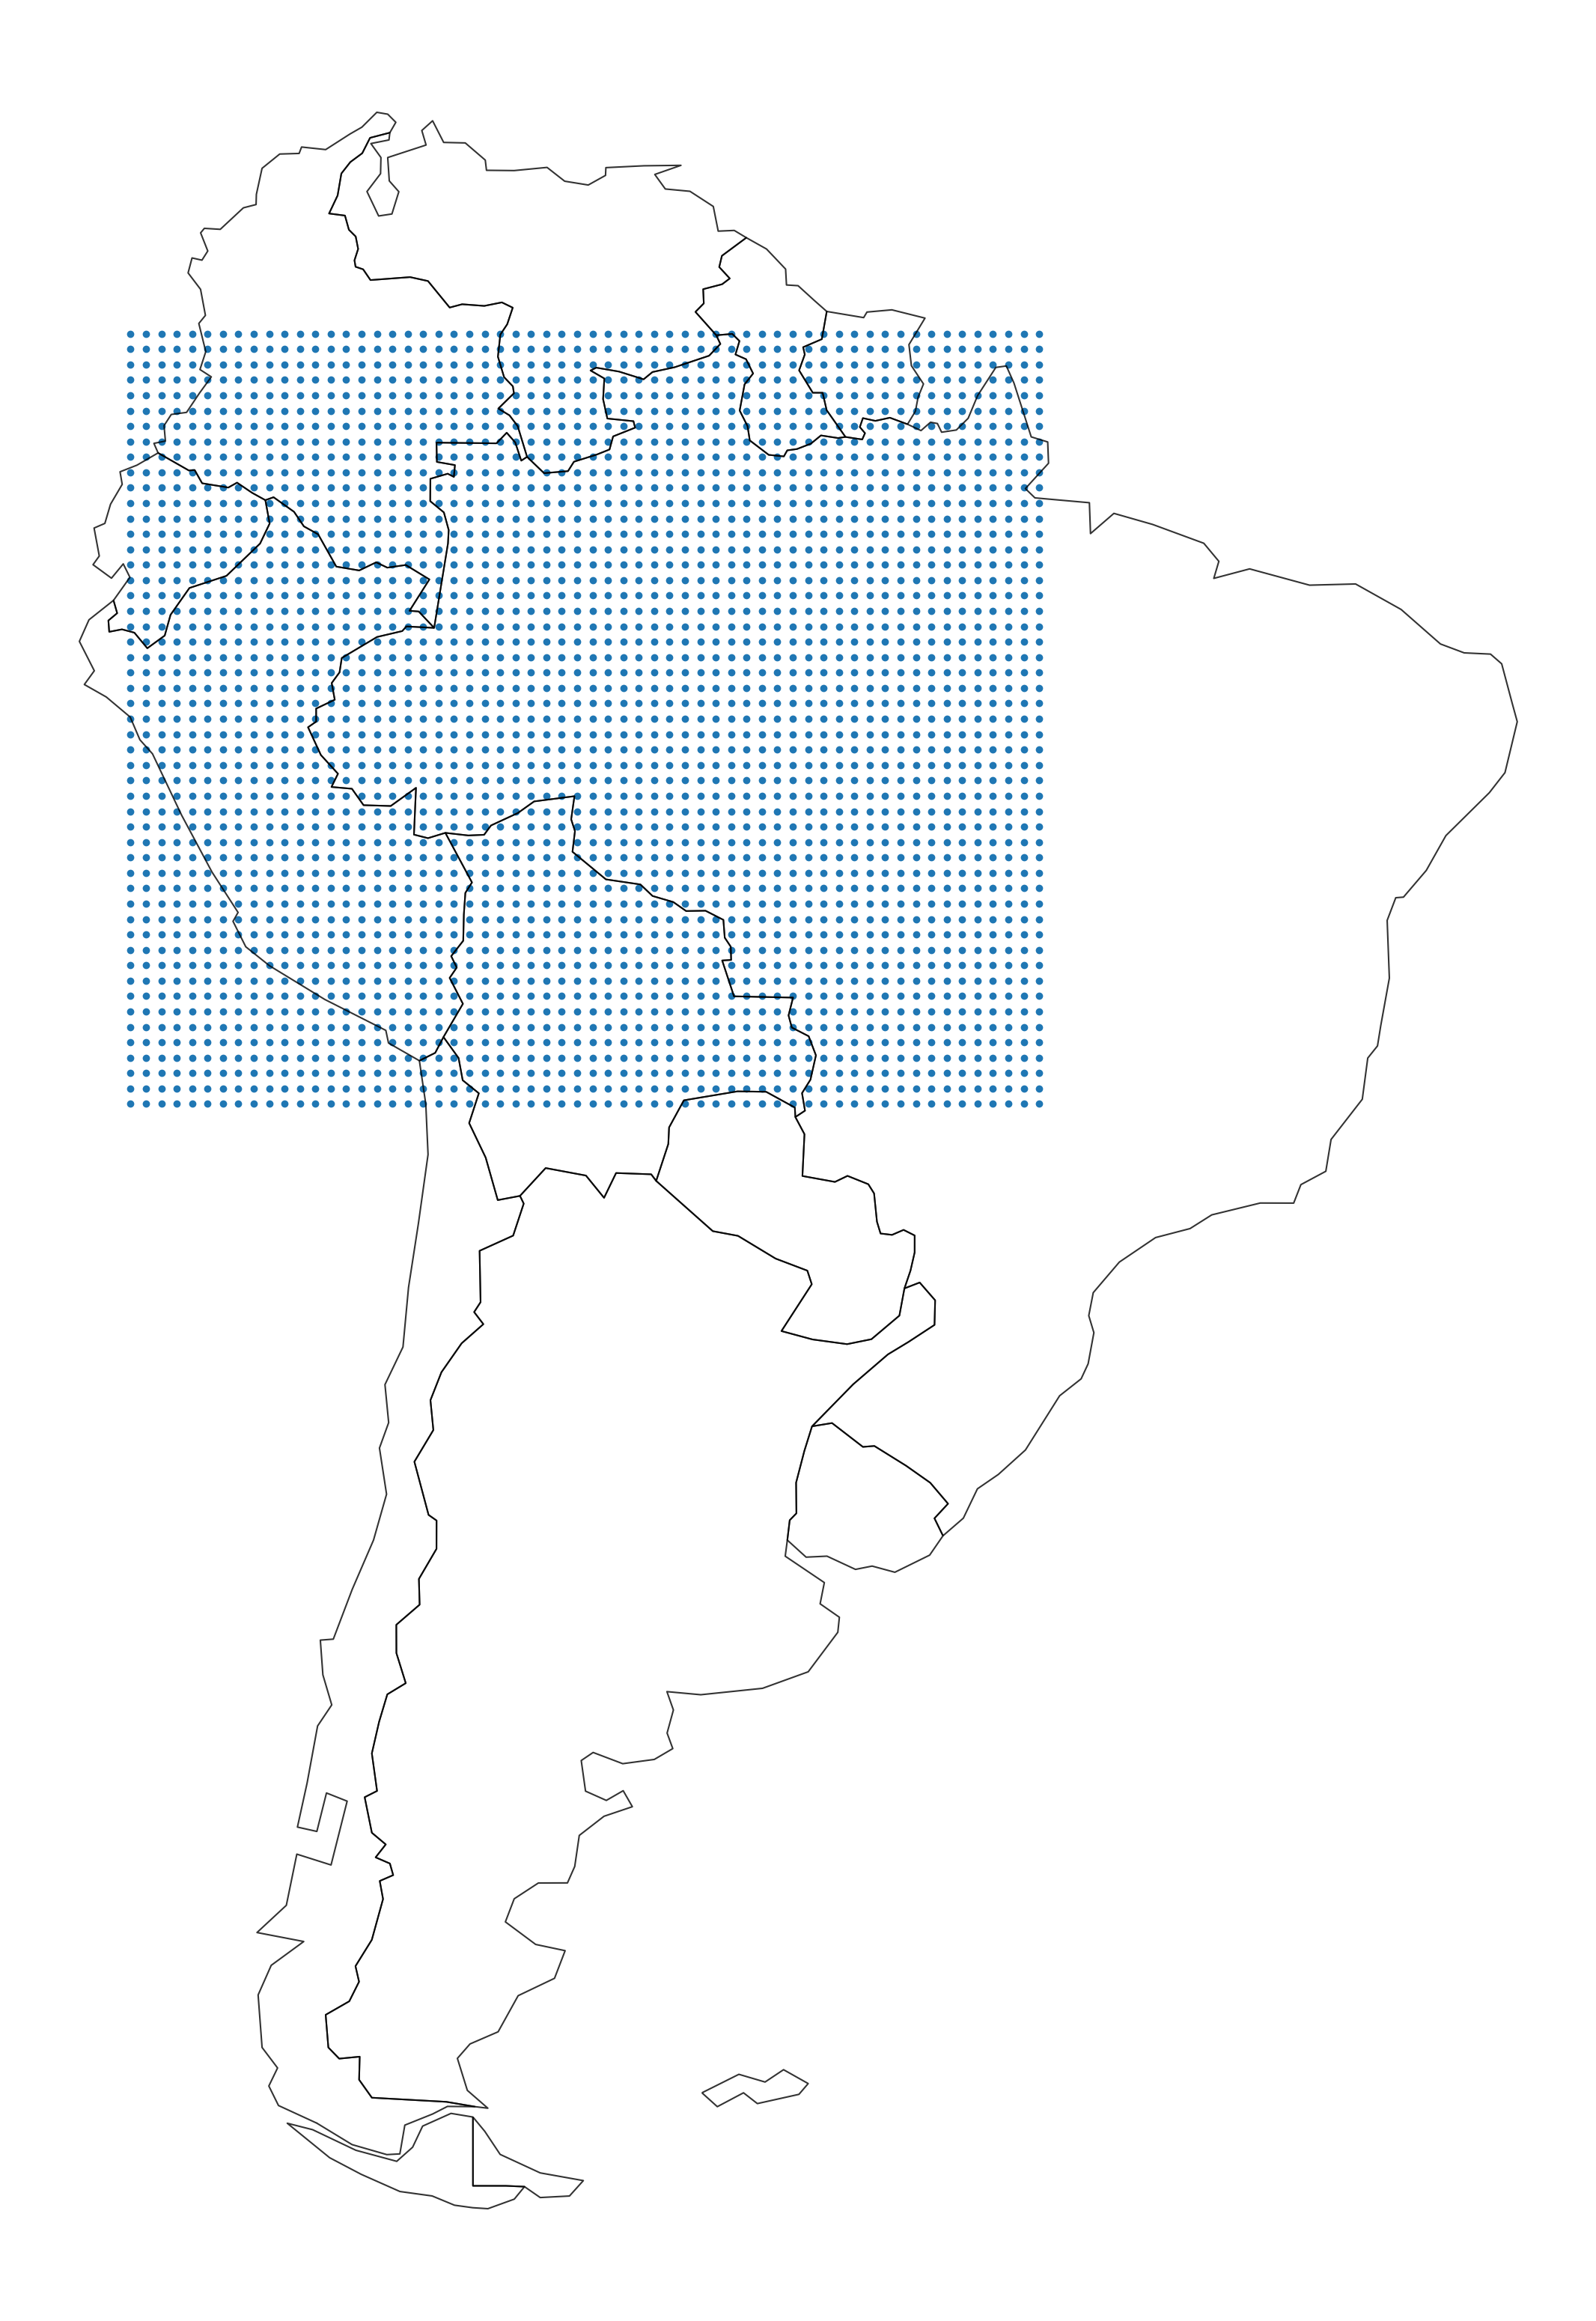

In [28]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(100,40))
world[world.continent == 'South America'].boundary.plot(ax=ax, alpha=0.8, color="black")
location_geo_unclean.plot(ax=ax,)
ax.set_axis_off()
plt.savefig("./plots/north_america_unclean_geo.jpg")

In [24]:
set(world.continent	)

{'Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'Seven seas (open ocean)',
 'South America'}